<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/HonGong_ML_DL/07_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

### **키워드:** 로지스틱 회귀, 다중 분류, 시그모이드 함수, 소프트맥스 함수

로지스틱 회귀 알고리즘을 이용해 이진 분류 문제를 해결해보자.

In [21]:
# Packages
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from scipy.special import expit
from scipy.special import softmax

import matplotlib.pyplot as plt

## 데이터 준비

In [2]:
fish = pd.read_csv('https://bit.ly/fish_csv')
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [4]:
fish_target = fish['Species'].to_numpy()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(fish_input,fish_target, random_state=42)

In [6]:
# StandardScaler
ss = StandardScaler()
ss.fit(x_train)
train_scaled = ss.transform(x_train)
test_scaled = ss.transform(x_test)

## 로지스틱 회귀

#### 회귀라는 이름을 가진 분류 모델
- 선형 회귀와 동일하게 선형 방정식을 학습

$z = a \times feature_1 + b \times feature_2 + c \times feature_3 + ...$

위 식에서 $z$는 확률이므로, 0~1사이 값이어야 한다. 아주 큰 음수일 때 0, 아주 큰 양수일 때 1이 되도록 바꾸기 위해 **시그모이드 함수(또는 로지스틱 함수)**를 사용한다.

### 시그모이드 함수 (Sigmoid Function)

#### $\phi={1\over{1+e^{-z}}}$

선형 방정식의 출력 $z$의 음수를 사용해 자연 상수 $e$를 거듭제곱하고, 여기에 1을 더해 역수를 취한다.

이 식을 이용해 그래프를 그릴 경우, $z$가 무한하게 큰 음수일 경우 0에 수렴하고, 무한하게 큰 양수일 경우 1에 수렴하는 형태를 띄게 된다. 또한 $z$가 0일 때는 0.5의 값을 가지게 된다.



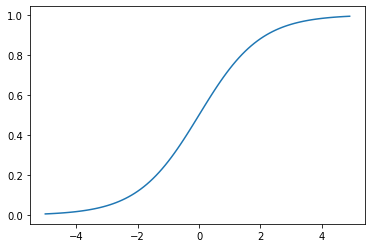

In [7]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

이진 분류의 경우, 0.5보다 크면 양성, 0.5와 같거나 작으면 음성(사이킷런의 경우 - 라이브러리마다 다름) 클래스로 분류한다.

### 로지스틱 회귀로 이진 분류 수행하기

넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다. 이를 **불리언 인덱싱(Boolean Indexing)**이라고 한다.

이와 

In [8]:
bream_smelt_indexes = (y_train == 'Bream') | (y_train == 'Smelt') # 비트 OR 연산자 (|) 사용
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = y_train[bream_smelt_indexes]

`bream_smelt_indexes`는 도미와 빙어 행의 인덱스만을 골라낸 배열이다. 이 배열을 이용하면 `train_scaled`와 `train_target` 배열에 Boolean Indexing을 적용함으로써 도미와 빙어 데이터만을 골라낼 수 있다.

In [23]:
lr = LogisticRegression() 
'''
solver: 
알고리즘 선택
default lbfgs
0.19버전이상 > saga의 성능이 전반적으로 좋아 많이 사용

penalty:
규제 방식 선택
default l2
'''
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [10]:
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5])) # class 예측 확률

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


첫 번째 열은 음성(0) 클래스의 확률, 두 번째 열은 양성(1) 클래스의 확률을 나타낸다.

사이킷런에서는 음성과 양성을 알파벳순으로 정렬하므로, Bream이 음성, Smelt가 양성이다.

\* Bream을 양성으로 사용하고 싶다면, Bream인 타깃값을 1, 나머지를 0으로 만들어서 사용하면 된다.

In [11]:
print(lr.classes_)

['Bream' 'Smelt']


로지스틱 회귀가 학습한 계수를 확인해 보자.

In [12]:
print(lr.coef_, lr.intercept_) # feature별 계수 & 절편

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


**$z = (-0.404) \times (Weight) + (-0.576) \times (Length) + (-0.663) \times (Diagonal) + (-1.013) \times (Height) + (-0.732) \times (Width) - 2.162$**

LogisticRegression 클래스는 `decision_function()` 메서드로 $z$값을 출력할 수 있다.

In [13]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


위 $z$값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.

시그모이드 함수는 Scipy 라이브러리가 `expit()`라는 이름의 메서드로 제공하고 있는데, 이는 `np.exp()` 함수를 사용하여 계산하는 것보다 간편하고 안전하다.

In [14]:
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


`decision_function()` 메서드는 양성 클래스에 대한 $z$값을 반환한다.

### 로지스틱 회귀로 다중 분류 수행하기

`LogisticRegression` 클래스는 기본적으로 반복적인 알고리즘을 사용한다. `max_iter` 매개변수에서 반복 횟수를 설정할 수 있고(default 100), 계수 제곱을 규제한다.

이러한 방식은 릿지 회귀에서의 규제와 같으며, 이를 L2 규제라고 한다. 릿지에서의 alpha와 같이, 로지스틱 회귀에서는 C 매개변수(default 1)가 규제의 강도를 조절하는 기능을 한다. 다만 alpha와는 반대로 작을수록 규제가 강해진다.

In [15]:
lr = LogisticRegression(C=20, max_iter=1_000) # 규제 완화 및 최대 반복 횟수 확대
lr.fit(train_scaled, y_train)
print(lr.score(train_scaled, y_train))
print(lr.score(test_scaled, y_test))

0.9327731092436975
0.925


In [16]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [18]:
print(lr.classes_)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 소수점 네 번째 자리에서 반올림

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


다중 분류도 이진 분류와 크게 다르지 않음을 확인할 수 있다.

이어서 선형 방정식의 모습을 알아보도록 하자.

In [19]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


5개의 특성을 사용하므로 `coef_`의 열은 5개이다.

행과 `intercept_`가 7개라는 것은 앞서 이진 분류에서 보았던 $z$를 7개 계산한다는 뜻으로, 다중 분류는 클래스마다 하나의 $z$를 계산함을 알 수 있다.

$z$를 0과 1 사이의 값으로 변환하던 이진 분류와 달리, 다중 분류는 **소프트맥스(Softmax)함수**를 사용하여 n개의 $z$값을 확률로 변환시킨다.

#### 소프트맥스(Softmax)
여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고, 전체 합이 1이 되도록 만드는 함수.

이를 위해 지수 함수를 사용하기 때문에 **정규화된 지수함수**라고 표현하기도 한다.

$e_{sum} = e^{z1} + e^{z2} +e^{z3} + ... + e^{z6} + e^{z7}$

$s_1 = {e^{z1}\over e_{sum}}$

$s_2 = {e^{z2}\over e_{sum}}$

$s_3= {e^{z3}\over e_{sum}}$

...

$s_6 = {e^{z6}\over e_{sum}}$

$s_7 = {e^{z7}\over e_{sum}}$

$s_1 + s_2 + s_3 + ... + s_6 + s_7 = 1$

In [20]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [22]:
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


앞서 구한 decision 배열을 `softmax()`함수에 전달했다. `softmax()`의 axis 매개변수는 소프트맥스 계산 축을 지정하며, `axis=1`인 경우 각 행, 즉 각 샘플에 대해 계산을 수행하게 된다. 만약 axis를 지정하지 않으면 전체 배열에 대해 계산을 수행한다.